In [19]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# aha manually reading each csv
df_budget = pd.read_csv("DATA/Budget_balance.csv")
df_burea = pd.read_csv("DATA/Bureaucracy_Quality.csv")
df_CAXGS = pd.read_csv("DATA/CAXGS.csv")
df_comp = pd.read_csv("DATA/Composite.csv")
df_corrup = pd.read_csv("DATA/Corruption.csv")
df_curr_ac = pd.read_csv("DATA/Current_account.csv")
df_debt = pd.read_csv("DATA/Debt_service_risk.csv")
df_demo_ac = pd.read_csv("DATA/Democratic_accountability.csv")
df_ethnic = pd.read_csv("DATA/Ethnic_tension.csv")
df_exch_rat = pd.read_csv("DATA/Exchange_Rate_Stability.csv")
df_external_conf = pd.read_csv("DATA/External_Conflict.csv")
df_for_debt = pd.read_csv("DATA/Foreign_Debt.csv")
# df_gdp_per_cap = pd.read_csv("DATA/GDP_per_capita.csv") # excluding these since we can just get raw gdp
# df_gdp_growth = pd.read_csv("DATA/GDPGrowth.csv") 
df_inflation = pd.read_csv("DATA/Inflation.csv")
df_int_liq = pd.read_csv("DATA/International_Liquidity.csv")
df_law_ord = pd.read_csv("DATA/Law_and_order.csv")
df_mil_pol = pd.read_csv("DATA/Military_in_politics.csv")
df_reli_tension = pd.read_csv("DATA/Religious_tensions.csv")
df_GDP = pd.read_csv("DATA/GDP_data.csv")

In [21]:
all_df = [df_budget, df_burea, df_CAXGS, df_comp, df_corrup, df_curr_ac, df_debt, df_demo_ac, df_ethnic,
          df_exch_rat, df_external_conf, df_inflation, df_int_liq, df_law_ord, df_mil_pol, df_reli_tension,
          df_GDP]
features = ["Budget_Balanace", "Bureaucracy_Quality", "CAXGS", "Composite", "Corruption", "CACC", "DebtServ", 
            "Democratic_Accountability", "Ethnic_Tension", "Exchange_Rate", "External_Conflict", "Inflation",
            "International_Liquidity", "Law_Order", "Military_Politic", "Religious_Tension", "GDP"]

In [22]:
df_budget[["Country","2020"]]

,Country,2020
0,Albania,5.38
1,Algeria,2.08
2,Angola,5.25
3,Argentina,4.50
4,Armenia,5.75
...,...,...
142,Vietnam,5.25
143,West Germany,NaN
144,Yemen,4.88
145,Zambia,4.17


In [23]:
df_GDP.rename(columns={"Country Name": "Country"}, inplace=True)

In [24]:
df_GDP.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,...,8.992957e+11,8.298300e+11,9.401055e+11,1.012719e+12,1.006527e+12,9.290741e+11,1.086772e+12,1.183962e+12,1.236163e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.188413e+10,1.268566e+10,1.360683e+10,1.443998e+10,1.576911e+10,1.693448e+10,...,7.693673e+11,6.921811e+11,6.857502e+11,7.681896e+11,8.239336e+11,7.871467e+11,8.459930e+11,8.771408e+11,7.965862e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.472296e+10,NaN


In [25]:
df_GDP["Country"]

0                            Aruba
1      Africa Eastern and Southern
2                      Afghanistan
3       Africa Western and Central
4                           Angola
                  ...             
261                         Kosovo
262                    Yemen, Rep.
263                   South Africa
264                         Zambia
265                       Zimbabwe
Name: Country, Length: 266, dtype: object

In [26]:
cool_df = df_GDP[["Country"]].copy()
cool_df

,Country
0,Aruba
1,Africa Eastern and Southern
2,Afghanistan
3,Africa Western and Central
4,Angola
...,...
261,Kosovo
262,"Yemen, Rep."
263,South Africa
264,Zambia


In [27]:
# 2019 Data
# isolate everything for just 2019
# rename columns
df_merged_2019 = df_GDP[["Country"]].copy()

for i in range(len(all_df)):
    df_temp = all_df[i][["Country", "2019"]]
    df_temp.rename(columns={"2019":features[i]}, inplace = True)
    df_merged_2019 = pd.merge(df_merged_2019, df_temp, on="Country", how="inner")

df_merged_2019.head()

/var/folders/8h/rxm2128d7qn4l7kqdy6pv8wc0000gn/T/ipykernel_54055/2215682289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={"2019":features[i]}, inplace = True)
/var/folders/8h/rxm2128d7qn4l7kqdy6pv8wc0000gn/T/ipykernel_54055/2215682289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={"2019":features[i]}, inplace = True)
/var/folders/8h/rxm2128d7qn4l7kqdy6pv8wc0000gn/T/ipykernel_54055/2215682289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Country,Budget_Balanace,Bureaucracy_Quality,CAXGS,Composite,Corruption,CACC,DebtServ,Democratic_Accountability,Ethnic_Tension,Exchange_Rate,External_Conflict,Inflation,International_Liquidity,Law_Order,Military_Politic,Religious_Tension,GDP
0,Angola,7.63,1.5,11.50,59.02,2.17,10.50,7.88,2.5,3.0,4.42,10.50,4.75,3.50,2.5,2.0,4.0,7.089796e+10
1,Albania,6.50,2.0,10.83,70.17,2.50,9.50,9.50,5.0,4.5,10.00,10.58,9.50,3.83,3.0,5.0,5.0,1.540183e+10
2,Argentina,5.79,3.0,10.08,61.40,2.46,10.42,9.50,4.0,6.0,2.17,9.96,2.75,4.00,2.0,4.5,6.0,4.477547e+11
3,Armenia,6.50,1.0,11.13,68.50,2.00,10.13,9.38,4.0,5.5,10.00,7.38,9.63,2.50,3.0,3.5,5.0,1.361929e+10
4,Australia,7.75,4.0,11.50,79.48,4.50,10.75,9.00,6.0,3.5,9.54,11.00,9.75,1.50,5.5,6.0,6.0,1.394671e+12


In [28]:
df_merged_2019.describe()

,Budget_Balanace,Bureaucracy_Quality,CAXGS,Composite,Corruption,CACC,DebtServ,Democratic_Accountability,Ethnic_Tension,Exchange_Rate,External_Conflict,Inflation,International_Liquidity,Law_Order,Military_Politic,Religious_Tension,GDP
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,1.180000e+02
mean,6.339224,2.284224,11.300172,70.016552,2.805259,10.848879,9.474224,4.334914,3.902328,9.370690,9.806466,8.867586,2.304138,3.630776,3.850862,4.505431,6.763642e+11
std,1.309161,1.093433,1.872636,8.837033,1.172936,2.239878,0.712098,1.363970,1.216767,1.450898,1.099090,1.447573,1.640693,1.288479,1.628127,1.302068,2.448927e+12
min,2.500000,0.000000,3.000000,39.230000,0.500000,2.500000,6.080000,1.000000,1.000000,0.000000,7.000000,2.500000,0.000000,0.500000,0.000000,1.000000,3.319596e+09
25%,5.500000,1.500000,10.897500,64.432500,2.000000,10.000000,9.030000,3.320000,3.000000,9.660000,9.397500,8.500000,1.000000,2.500000,2.500000,3.657500,2.478386e+10
50%,6.440000,2.000000,11.500000,70.160000,2.500000,10.500000,9.750000,4.500000,4.000000,9.750000,10.000000,9.270000,2.415000,3.500000,4.000000,5.000000,7.148996e+10
75%,7.390000,3.000000,12.500000,76.440000,3.500000,12.520000,10.000000,5.500000,5.000000,10.000000,10.500000,9.920000,3.500000,5.000000,5.000000,5.500000,3.739120e+11
max,10.000000,4.000000,13.920000,89.100000,5.500000,15.000000,10.000000,6.000000,6.000000,10.000000,12.000000,10.000000,5.000000,6.000000,6.000000,6.000000,2.152140e+13


In [29]:
df_merged_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    118 non-null    object 
 1   Budget_Balanace            116 non-null    float64
 2   Bureaucracy_Quality        116 non-null    float64
 3   CAXGS                      116 non-null    float64
 4   Composite                  116 non-null    float64
 5   Corruption                 116 non-null    float64
 6   CACC                       116 non-null    float64
 7   DebtServ                   116 non-null    float64
 8   Democratic_Accountability  116 non-null    float64
 9   Ethnic_Tension             116 non-null    float64
 10  Exchange_Rate              116 non-null    float64
 11  External_Conflict          116 non-null    float64
 12  Inflation                  116 non-null    float64
 13  International_Liquidity    116 non-null    float64

In [30]:
df_merged_2019.isna().sum()

Country                      0
Budget_Balanace              2
Bureaucracy_Quality          2
CAXGS                        2
Composite                    2
Corruption                   2
CACC                         2
DebtServ                     2
Democratic_Accountability    2
Ethnic_Tension               2
Exchange_Rate                2
External_Conflict            2
Inflation                    2
International_Liquidity      2
Law_Order                    2
Military_Politic             2
Religious_Tension            2
GDP                          0
dtype: int64

In [31]:
df_merged_2019.dropna(inplace=True)

In [32]:
df_features = df_merged_2019.drop(columns=["Country"])
df_features.head()

,Budget_Balanace,Bureaucracy_Quality,CAXGS,Composite,Corruption,CACC,DebtServ,Democratic_Accountability,Ethnic_Tension,Exchange_Rate,External_Conflict,Inflation,International_Liquidity,Law_Order,Military_Politic,Religious_Tension,GDP
0,7.63,1.5,11.50,59.02,2.17,10.50,7.88,2.5,3.0,4.42,10.50,4.75,3.50,2.5,2.0,4.0,7.089796e+10
1,6.50,2.0,10.83,70.17,2.50,9.50,9.50,5.0,4.5,10.00,10.58,9.50,3.83,3.0,5.0,5.0,1.540183e+10
2,5.79,3.0,10.08,61.40,2.46,10.42,9.50,4.0,6.0,2.17,9.96,2.75,4.00,2.0,4.5,6.0,4.477547e+11
3,6.50,1.0,11.13,68.50,2.00,10.13,9.38,4.0,5.5,10.00,7.38,9.63,2.50,3.0,3.5,5.0,1.361929e+10
4,7.75,4.0,11.50,79.48,4.50,10.75,9.00,6.0,3.5,9.54,11.00,9.75,1.50,5.5,6.0,6.0,1.394671e+12


(array([ 5., 19., 18., 25., 12., 20.,  7.,  6.,  2.,  2.]),
 array([21.92310908, 22.80080504, 23.678501  , 24.55619696, 25.43389291,
        26.31158887, 27.18928483, 28.06698079, 28.94467675, 29.82237271,
        30.70006867]),
 <BarContainer object of 10 artists>)

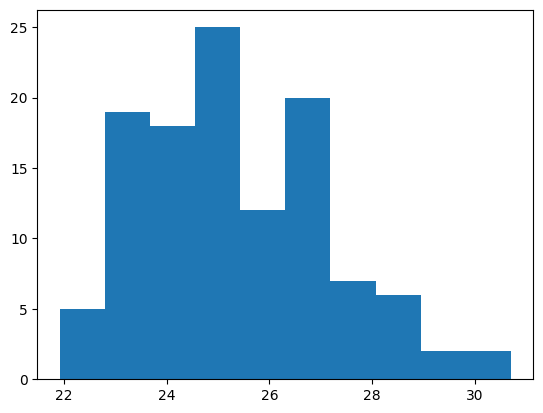

In [33]:
df_merged_2019['GDP'] = np.log(df_merged_2019['GDP'])
plt.hist(df_merged_2019['GDP'])

In [34]:
# plt.figure(figsize=(20, 20))
# sns.pairplot(data=df_features, diag_kind = 'hist', kind = 'scatter', hue="GDP")
# plt.legend()
# plt.show()

Text(0.5, 1.0, 'Correlation Among Numerical Features')

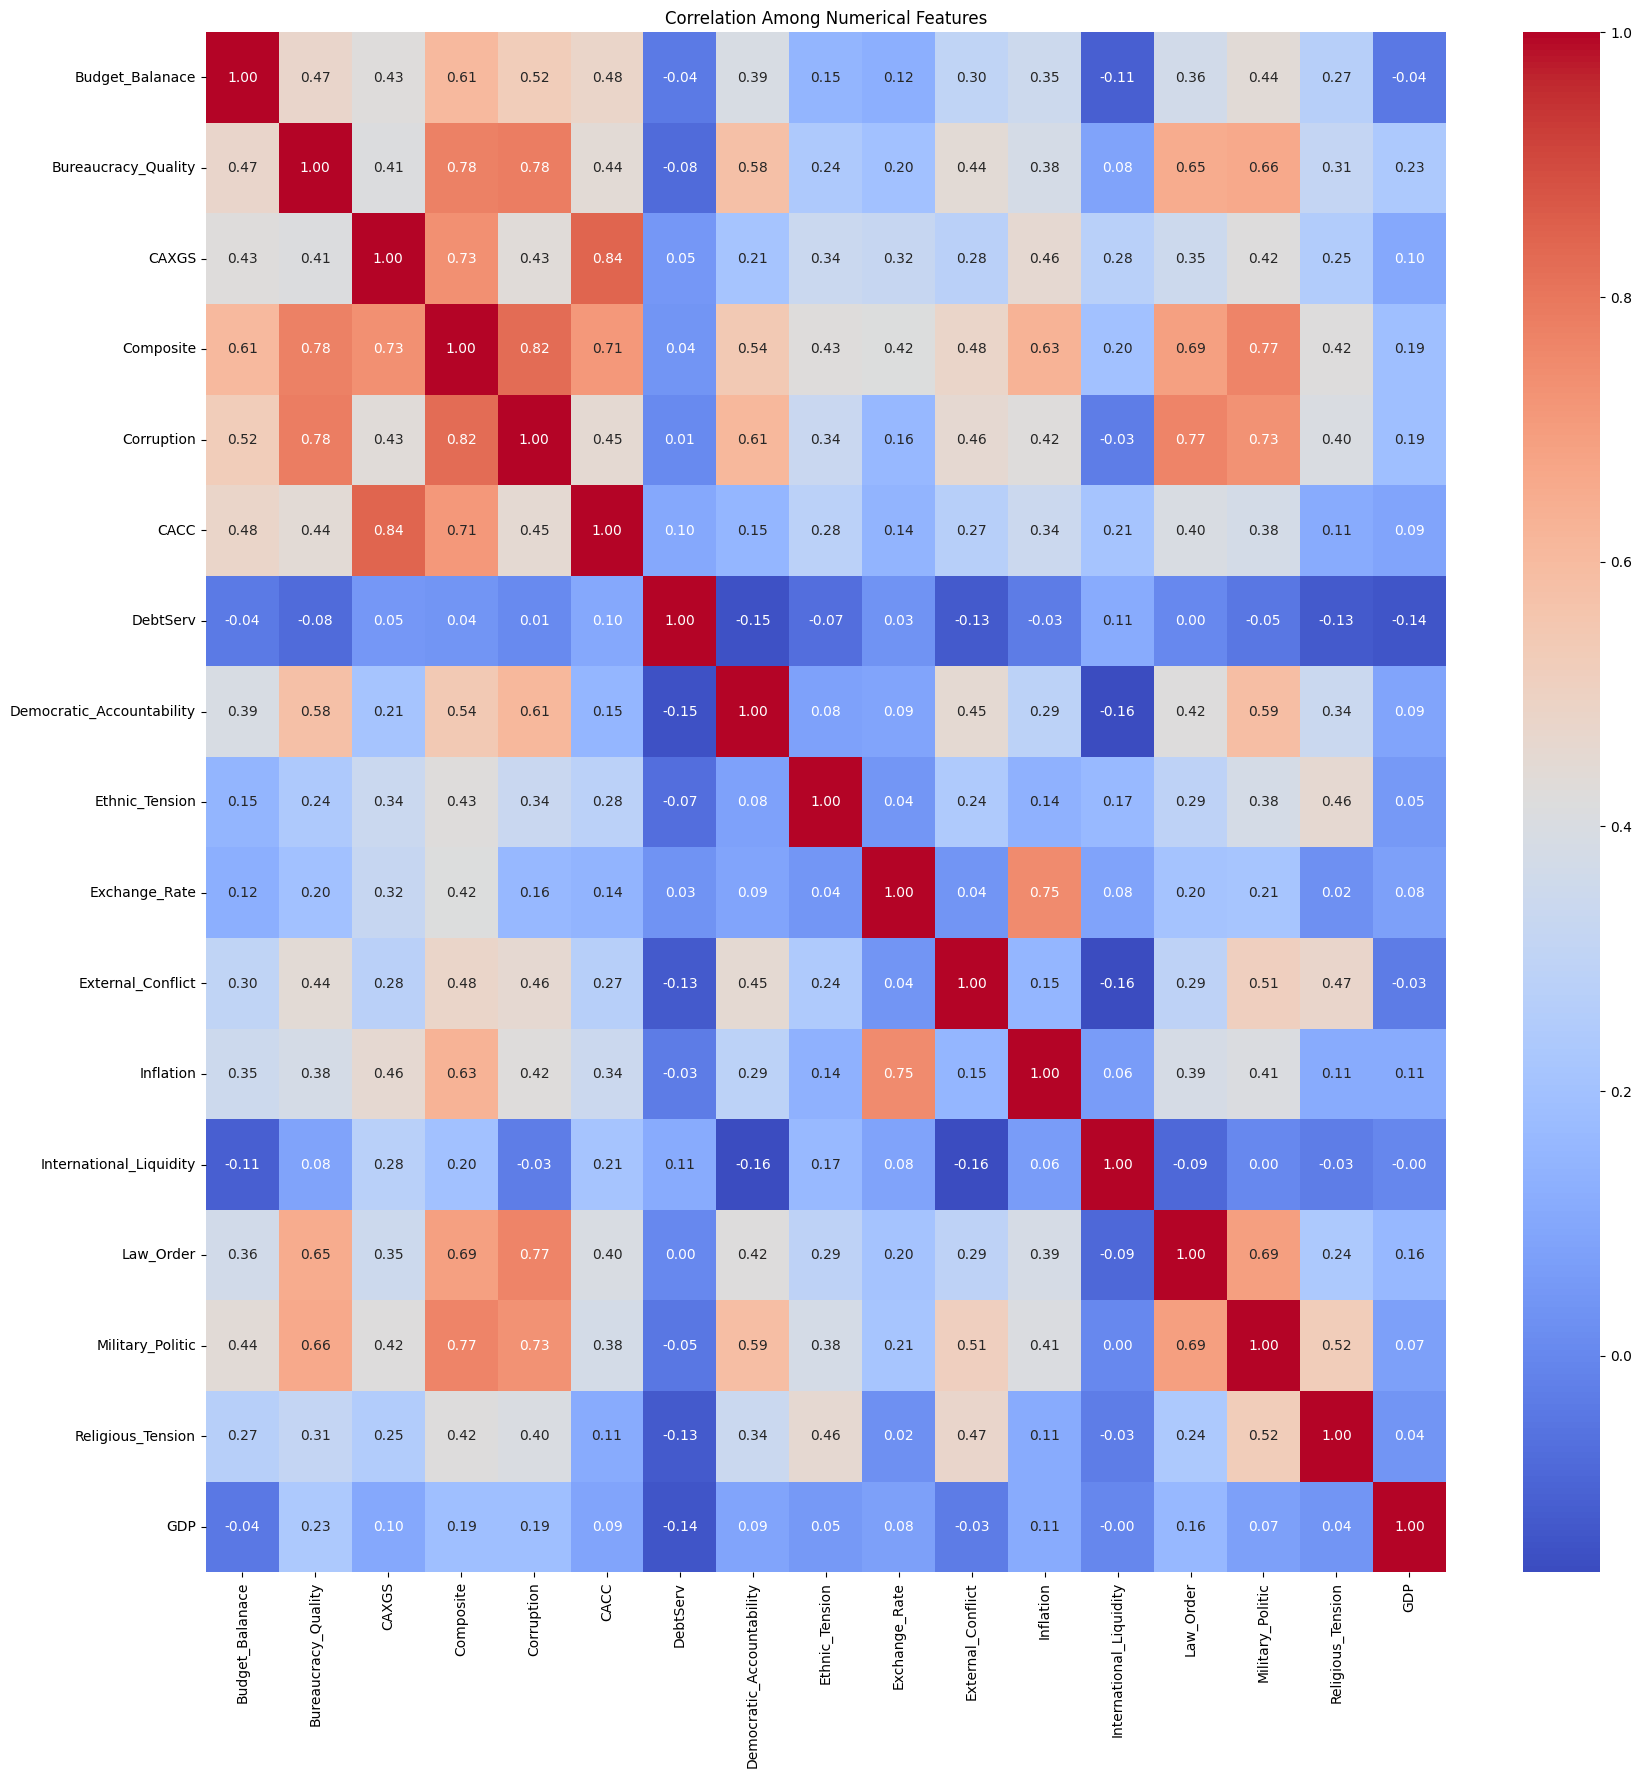

In [35]:
corr_matrix = df_features.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Among Numerical Features")

In [36]:
# 2020 data
df_merged_2020 = df_GDP[["Country"]].copy()

for i in range(len(all_df)):
    df_temp = all_df[i][["Country", "2020"]]
    df_temp.rename(columns={"2020":features[i]}, inplace = True)
    df_merged_2020 = pd.merge(df_merged_2020, df_temp, on="Country", how="inner")

# 2021 data
df_merged_2021 = df_GDP[["Country"]].copy()

for i in range(len(all_df)):
    df_temp = all_df[i][["Country", "2021"]]
    df_temp.rename(columns={"2021":features[i]}, inplace = True)
    df_merged_2021 = pd.merge(df_merged_2021, df_temp, on="Country", how="inner")

df_merged_2020['GDP'] = np.log(df_merged_2020['GDP'])
df_merged_2021['GDP'] = np.log(df_merged_2021['GDP'])

/var/folders/8h/rxm2128d7qn4l7kqdy6pv8wc0000gn/T/ipykernel_54055/3718941252.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={"2020":features[i]}, inplace = True)
/var/folders/8h/rxm2128d7qn4l7kqdy6pv8wc0000gn/T/ipykernel_54055/3718941252.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={"2020":features[i]}, inplace = True)
/var/folders/8h/rxm2128d7qn4l7kqdy6pv8wc0000gn/T/ipykernel_54055/3718941252.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [43]:
df_merged_2019['Year'] = 2019
df_merged_2020['Year'] = 2020
df_merged_2021['Year'] = 2021

df_merged_2019.dropna(inplace=True)
df_merged_2020.dropna(inplace=True)
df_merged_2021.dropna(inplace=True)

df_merged_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 0 to 117
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    116 non-null    object 
 1   Budget_Balanace            116 non-null    float64
 2   Bureaucracy_Quality        116 non-null    float64
 3   CAXGS                      116 non-null    float64
 4   Composite                  116 non-null    float64
 5   Corruption                 116 non-null    float64
 6   CACC                       116 non-null    float64
 7   DebtServ                   116 non-null    float64
 8   Democratic_Accountability  116 non-null    float64
 9   Ethnic_Tension             116 non-null    float64
 10  Exchange_Rate              116 non-null    float64
 11  External_Conflict          116 non-null    float64
 12  Inflation                  116 non-null    float64
 13  International_Liquidity    116 non-null    float64
 14 

In [44]:
df_merged_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 0 to 117
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    116 non-null    object 
 1   Budget_Balanace            116 non-null    float64
 2   Bureaucracy_Quality        116 non-null    float64
 3   CAXGS                      116 non-null    float64
 4   Composite                  116 non-null    float64
 5   Corruption                 116 non-null    float64
 6   CACC                       116 non-null    float64
 7   DebtServ                   116 non-null    float64
 8   Democratic_Accountability  116 non-null    float64
 9   Ethnic_Tension             116 non-null    float64
 10  Exchange_Rate              116 non-null    float64
 11  External_Conflict          116 non-null    float64
 12  Inflation                  116 non-null    float64
 13  International_Liquidity    116 non-null    float64
 14 

In [42]:
df_merged_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 0 to 117
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    116 non-null    object 
 1   Budget_Balanace            116 non-null    float64
 2   Bureaucracy_Quality        116 non-null    float64
 3   CAXGS                      116 non-null    float64
 4   Composite                  116 non-null    float64
 5   Corruption                 116 non-null    float64
 6   CACC                       116 non-null    float64
 7   DebtServ                   116 non-null    float64
 8   Democratic_Accountability  116 non-null    float64
 9   Ethnic_Tension             116 non-null    float64
 10  Exchange_Rate              116 non-null    float64
 11  External_Conflict          116 non-null    float64
 12  Inflation                  116 non-null    float64
 13  International_Liquidity    116 non-null    float64
 14 

In [53]:
filtered_df_2020 = df_merged_2020[df_merged_2020['Country'].isin(df_merged_2021['Country']) &
                                  df_merged_2020['Country'].isin(df_merged_2019['Country'])]
filtered_df_2021 = df_merged_2021[df_merged_2021['Country'].isin(df_merged_2020['Country']) &
                                  df_merged_2021['Country'].isin(df_merged_2019['Country'])]
filtered_df_2019 = df_merged_2019[df_merged_2019['Country'].isin(df_merged_2021['Country']) &
                                  df_merged_2019['Country'].isin(df_merged_2020['Country'])]
# filtered_df_2020.info()
# filtered_df_2021.info()
# filtered_df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 117
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    115 non-null    object 
 1   Budget_Balanace            115 non-null    float64
 2   Bureaucracy_Quality        115 non-null    float64
 3   CAXGS                      115 non-null    float64
 4   Composite                  115 non-null    float64
 5   Corruption                 115 non-null    float64
 6   CACC                       115 non-null    float64
 7   DebtServ                   115 non-null    float64
 8   Democratic_Accountability  115 non-null    float64
 9   Ethnic_Tension             115 non-null    float64
 10  Exchange_Rate              115 non-null    float64
 11  External_Conflict          115 non-null    float64
 12  Inflation                  115 non-null    float64
 13  International_Liquidity    115 non-null    float64
 14 

In [38]:
# combining all into one dataframe
